# Supervised Learning with Sikit-Learn

simple linear models for regression and classification

## Linear Models
A linear model is a sum of weighted variables that predicts a target output value given an input data instance.  

### Linear Models for Regression

- Least-squares linear regression (**LinearRegression**)
- **Ridg** regression
- **Lasso** regression

**polynomial** regression


In [1]:
%matplotlib notebook
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

### Datasets
Let's generate some synthetic dataset for regression

<IPython.core.display.Javascript object>


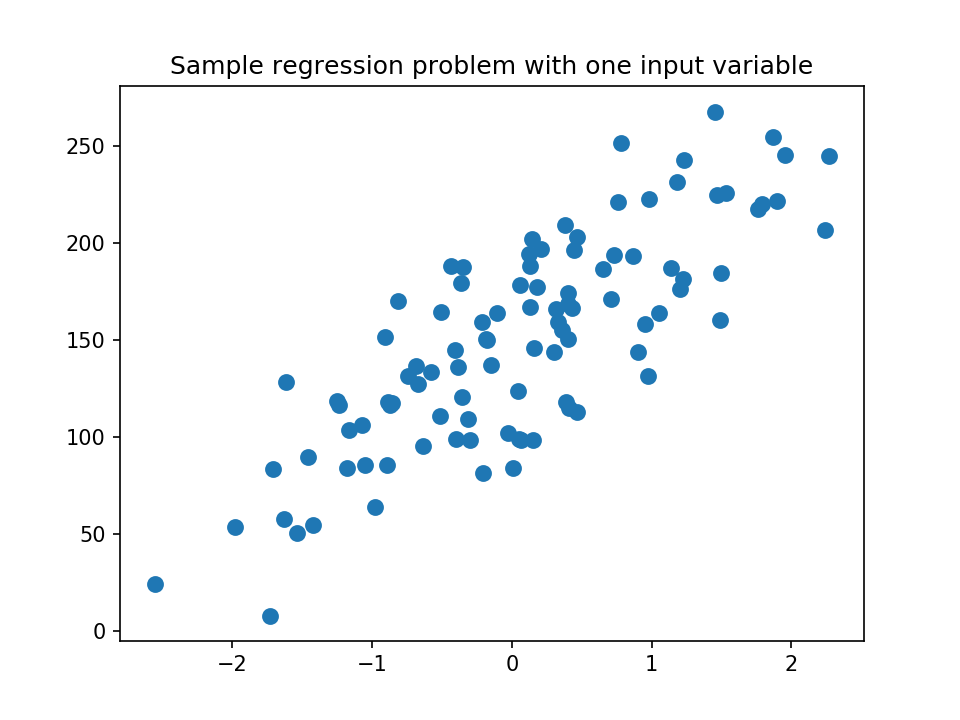

<IPython.core.display.Javascript object>


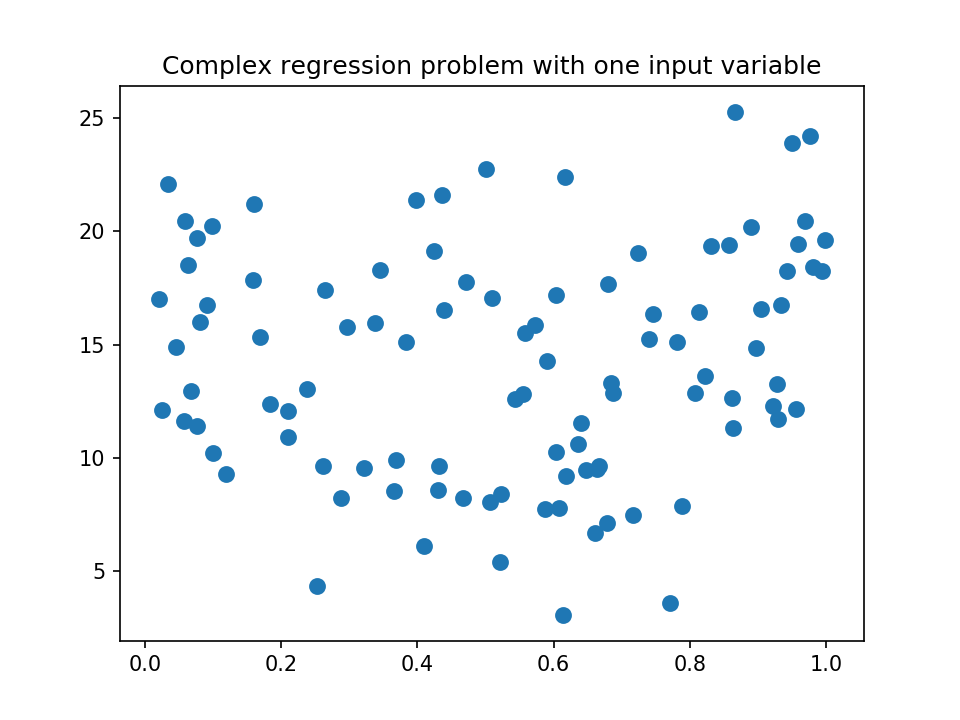

In [2]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression

plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()



### Spliting the data into training and testing

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,random_state=0)

### Linear regression
Least-Squares Linear Regression "Ordinary least-squares"
Finds wieghts w and bais b that minimizes the mean squared error of the linear model: the sum of squared differences between predicted target and actual target values.
No parameters to control model complexity.


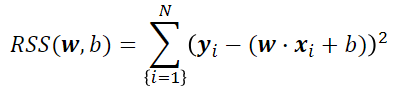

In [4]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))


linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446


<IPython.core.display.Javascript object>


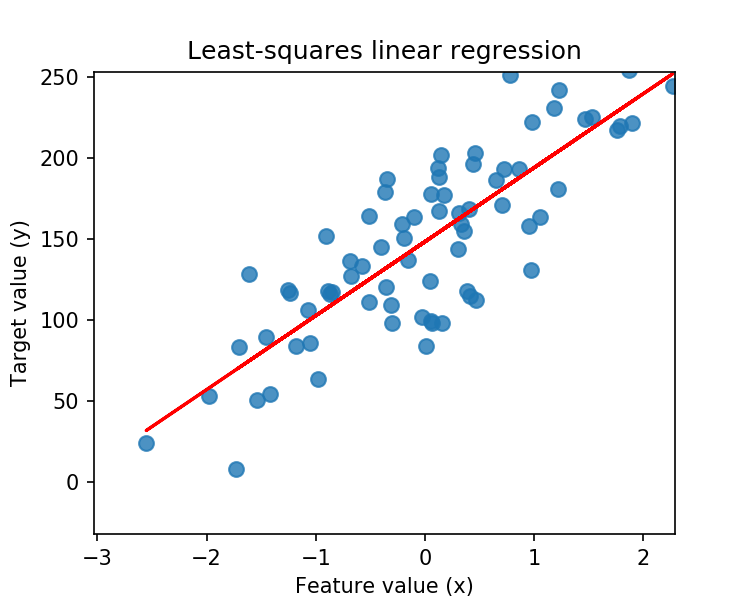

In [5]:
plt.figure(figsize=(5,4))
plt.scatter(X_train, y_train, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

#### Evaluation Regression Model
Also known as "coefficient of determination"

To evaluate the overall fit of a linear model, we use the R-squared value

- R-squared is the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**
  - The null model just predicts the mean of the observed response, and thus it has an intercept and no slope
- R-squared is between 0 and 1
- Higher values are better because it means that more variance is explained by the model.

In [6]:
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

R-squared score (training): 0.679
R-squared score (test): 0.492


#### Regression on Real Data
crime dataset: 
taking 88 prdictive features
we want to predict total number of violent crimes per 100K popuation 

In [7]:
from adspy_shared_utilities import load_crime_dataset

## load_crime_dataset()
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized
crime = pd.read_table('CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
# remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
crime = crime.ix[:,columns_to_keep].dropna()
X_crime = crime.ix[:,range(0,88)]
y_crime = crime['ViolentCrimesPerPop']
crime.head()

population  householdsize  agePct12t21  agePct12t29  agePct16t24  \
0       11980           3.10        12.47        21.44        10.93   
1       23123           2.82        11.01        21.30        10.48   
2       29344           2.43        11.36        25.88        11.01   
3       16656           2.40        12.55        25.20        12.19   
5      140494           2.45        18.09        32.89        20.04   

   agePct65up  numbUrban  pctUrban  medIncome  pctWWage  ...  \
0       11.33      11980     100.0      75122     89.24  ...   
1       17.18      23123     100.0      47917     78.99  ...   
2       10.28      29344     100.0      35669     82.00  ...   
3       17.57          0       0.0      20580     68.15  ...   
5       13.26     140494     100.0      21577     75.78  ...   

   MedOwnCostPctInc  MedOwnCostPctIncNoMtg  NumInShelters  NumStreet  \
0              21.1                   14.0             11          0   
1              20.7                   12.5              0          0   
2              21.7                   11.6             16          0   
3              20.6                   14.5              0          0   
5              17.3                   11.7            327          4   

   PctForeignBorn  PctBornSameState  PctSameHouse85  PctSameCity85  \
0           10.66             53.72           65.29          78.09   
1            8.30             77.17           71.27          90.22   
2            5.00             44.77           36.60          61.26   
3            2.04             88.71           56.70          90.17   
5            1.49             64.35           42.29          70.61   

   PctSameState85  ViolentCrimesPerPop  
0           89.14                41.02  
1           96.12               127.56  
2           82.85               218.59  
3           96.24               306.64  
5           85.66               442.95  

[5 rows x 89 columns]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
print('Training set size: {}'
     .format(X_train.shape[0]))
print('Test set size: {}'
     .format(X_test.shape[0]))

linreg = LinearRegression().fit(X_train, y_train)

Training set size: 1495
Test set size: 499


In [9]:
print('Crime dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: -1728.1306725946147
linear model coeff:
[ 1.61892346e-03 -9.43009110e+01  1.36067510e+01 -3.13380670e+01
 -8.15482716e-02 -1.69455128e+01 -2.42730375e-03  1.53013232e+00
 -1.39193248e-02 -7.72112833e+00  2.28112354e+01 -5.65708295e+00
  9.34751364e+00  2.06969566e-01 -7.43413626e+00  9.65856476e-03
  4.38030290e-03  4.79754625e-03 -4.46469212e+00 -1.60907140e+01
  8.82778012e+00 -5.06734503e-01 -1.42198055e+00  8.17551991e+00
 -3.87048268e+00 -3.54209213e+00  4.48758304e+00  9.30645715e+00
  1.73644996e+02  1.18220766e+01  1.51120836e+02 -3.29613007e+02
 -1.35343395e+02  6.95380108e-01 -2.38369008e+01  2.77038981e+00
  3.82248925e-01  4.38813358e+00 -1.06410851e+01 -4.92294176e-03
  4.14031827e+01 -1.16206866e-03  1.18568968e+00  1.75418465e+00
 -3.68283678e+00  1.59679443e+00 -8.42180230e+00 -3.79703897e+01
  4.74076990e+01 -2.50768374e+01 -2.88246410e-01 -3.65633234e+01
  1.89516080e+01 -4.53336736e+01  6.82698598e+02  1.04478671e+02
 -3.28575414

### Ridge regression
- Ridge regression learns w, busing the same least-squares criterion but adds a penalty for large variations in w parameters
- Regularization prevents overfitting by restricting the model, typically to reduce its complexity.
- Ridge regression uses **L2 regularization**: minimize sum of squares of w entries
- The influence of the regularization term is controlled by the alpha parameter.
- Higher alpha means more regularization and simpler models

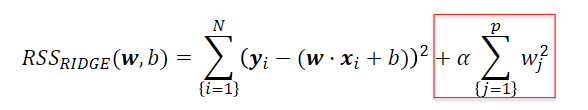

In [10]:
from sklearn.linear_model import Ridge

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: -3352.4230358464724
ridge regression linear model coeff:
[ 1.95091438e-03  2.19322667e+01  9.56286607e+00 -3.59178973e+01
  6.36465325e+00 -1.96885471e+01 -2.80715856e-03  1.66254486e+00
 -6.61426604e-03 -6.95450680e+00  1.71944731e+01 -5.62819154e+00
  8.83525114e+00  6.79085746e-01 -7.33614221e+00  6.70389803e-03
  9.78505502e-04  5.01202169e-03 -4.89870524e+00 -1.79270062e+01
  9.17572382e+00 -1.24454193e+00  1.21845360e+00  1.03233089e+01
 -3.78037278e+00 -3.73428973e+00  4.74595305e+00  8.42696855e+00
  3.09250005e+01  1.18644167e+01 -2.05183675e+00 -3.82210450e+01
  1.85081589e+01  1.52510829e+00 -2.20086608e+01  2.46283912e+00
  3.29328703e-01  4.02228467e+00 -1.12903533e+01 -4.69567413e-03
  4.27046505e+01 -1.22507167e-03  1.40795790e+00  9.35041855e-01
 -3.00464253e+00  1.12390514e+00 -1.82487653e+01 -1.54653407e+01
  2.41917002e+01 -1.32497562e+01 -4.20113118e-01 -3.59710660e+01
  1.29786751e+01 -2.80765995e+01  4.3851347

** The Need for Feature Normalization **
- Important for some machine learning methods that all features are on the same scale (e.g. faster convergence in learning, more uniform or 'fair' influence for all weights)
    - e.g. regularized regression, k-NN, support vector machines, neural networks, ...
- Can also depend on the data. For now, we do MinMaxscaling of the features:
    - For each feature:  compute the min value and the max value achieved across all instances in the training set.
    – For each feature:  transform a given feature value to a scaled version using the formula
    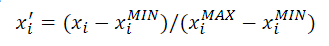

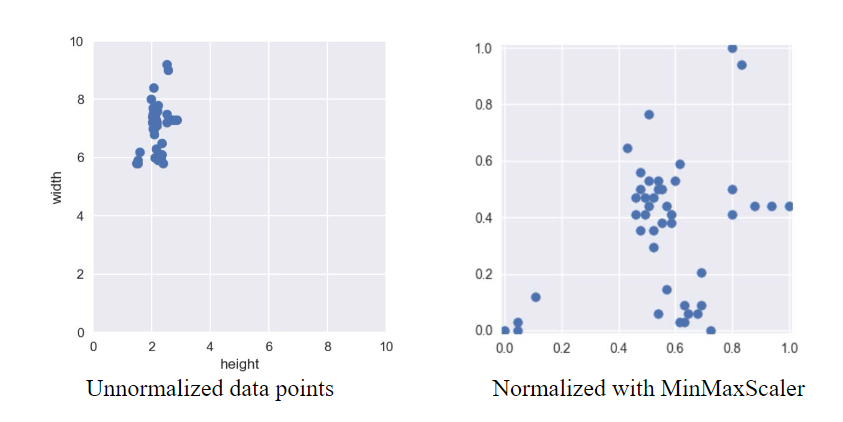

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


**The test set must use identical scaling to the training set**
- Fit the scaler using the training set, then apply the same scaler to transform the test set
- Do not scale the training and test sets using different scalers: this could lead to random skew in the data.
- Do not fit the scaler using any part of the test data: referencing the test data can lead to a form of data leakage.


In [13]:
X_test_scaled = scaler.transform(X_test)

#### Ridge regression with feature normalization

In [14]:
linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 933.3906385044147
ridge regression linear model coeff:
[  88.68827454   16.48947987  -50.30285445  -82.90507574  -65.89507244
   -2.27674244   87.74108514  150.94862182   18.8802613   -31.05554992
  -43.13536109 -189.44266328   -4.52658099  107.97866804  -76.53358414
    2.86032762   34.95230077   90.13523036   52.46428263  -62.10898424
  115.01780357    2.66942023    6.94331369   -5.66646499 -101.55269144
  -36.9087526    -8.7053343    29.11999068  171.25963057   99.36919476
   75.06611841  123.63522539   95.24316483 -330.61044265 -442.30179004
 -284.49744001 -258.37150609   17.66431072 -101.70717151  110.64762887
  523.13611718   24.8208959     4.86533322  -30.46775619   -3.51753937
   50.57947231   10.84840601   18.27680946   44.11189865   58.33588176
   67.08698975  -57.93524659  116.1446052    53.81163718   49.01607711
   -7.62262031   55.14288543  -52.08878272  123.39291017   77.12562171
   45.49795317  184.91229771  -91.3572

#### Ridge regression with regularization parameter: alpha

In [15]:
print('Ridge regression: effect of alpha regularization parameter\n')
all_alphas = [0, 1, 10, 20, 50, 100, 1000]
all_r2_train = []
all_r2_test = []
for this_alpha in all_alphas:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    all_r2_train.append(r2_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    all_r2_test.append(r2_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 88, r-squared training: 0.67, r-squared test: 0.47

Alpha = 1.00
num abs(coeff) > 1.0: 87, r-squared training: 0.66, r-squared test: 0.56

Alpha = 10.00
num abs(coeff) > 1.0: 87, r-squared training: 0.63, r-squared test: 0.59

Alpha = 20.00
num abs(coeff) > 1.0: 88, r-squared training: 0.61, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 86, r-squared training: 0.58, r-squared test: 0.58

Alpha = 100.00
num abs(coeff) > 1.0: 87, r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000.00
num abs(coeff) > 1.0: 84, r-squared training: 0.31, r-squared test: 0.30



<IPython.core.display.Javascript object>


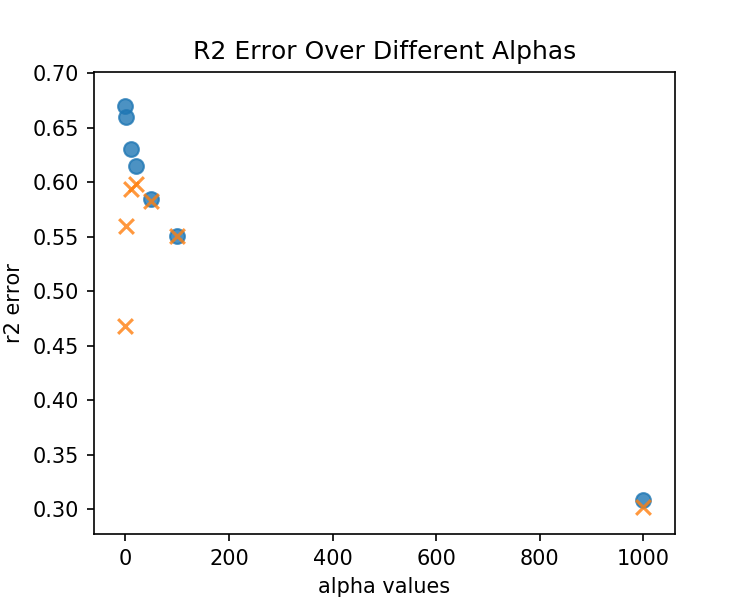

In [16]:
plt.figure(figsize=(5,4))
alphas = all_alphas
plt.scatter(alphas, all_r2_train, marker= 'o', s=50, alpha=0.8)
plt.scatter(alphas, all_r2_test, marker= 'x', s=50, alpha=0.8)
plt.title('R2 Error Over Different Alphas')
plt.xlabel('alpha values')
plt.ylabel('r2 error')
plt.show()

### Lasso regression
Lasso regression is another form of regularized linear regression that uses an **L1 regularization** penalty for training (instead of ridge's L2 penalty)
L1 penalty: Minimize the sum of the absolute values of the coefficients
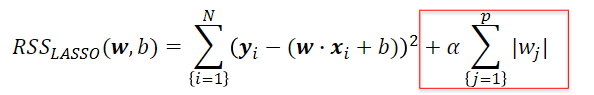

- This has the effect of setting parameter weights in wto zero for the least influential variables
- This is called a sparse solution: a kind of feature selection
- The parameter alpha controls amount of L1 regularization (default = 1.0).
- The prediction formula is the same as ordinary least-squares.

- **When to use ridge vs lasso regression:**
    - Many small/medium sized effects: use ridge.
    - Only a few variables with medium/large effect: use lasso.

In [17]:
from sklearn.linear_model import Lasso

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 1186.6120619985782
lasso regression linear model coeff:
[    0.             0.            -0.          -168.18346054
    -0.            -0.             0.           119.6938194
     0.            -0.             0.          -169.67564456
    -0.             0.            -0.             0.
     0.             0.            -0.            -0.
     0.            -0.             0.             0.
   -57.52991966    -0.            -0.             0.
   259.32889226    -0.             0.             0.
     0.            -0.         -1188.7396867     -0.
    -0.            -0.          -231.42347299     0.
  1488.36512229     0.            -0.            -0.
    -0.             0.             0.             0.
     0.             0.            -0.             0.
    20.14419415     0.             0.             0.
     0.             0.           339.04468804     0.
     0.           459.53799903    -0.             0.
   122.69221826   

- PctKidsBornNeverMar: # percentage of kids born to people who never married
- PctKids2Par: # percentage of kids in family housing with two parents

#### Lasso regression with regularization parameter: alpha

In [18]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')
all_alphas = [0.5, 1, 2, 3, 5, 10, 20, 50]
all_r2_train = []
all_r2_test = []
for alpha in all_alphas:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    all_r2_train.append(r2_train)
    all_r2_test.append(r2_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 35, r-squared training: 0.65, r-squared test: 0.58

Alpha = 1.00
Features kept: 25, r-squared training: 0.64, r-squared test: 0.60

Alpha = 2.00
Features kept: 20, r-squared training: 0.63, r-squared test: 0.62

Alpha = 3.00
Features kept: 17, r-squared training: 0.62, r-squared test: 0.63

Alpha = 5.00
Features kept: 12, r-squared training: 0.60, r-squared test: 0.61

Alpha = 10.00
Features kept: 6, r-squared training: 0.57, r-squared test: 0.58

Alpha = 20.00
Features kept: 2, r-squared training: 0.51, r-squared test: 0.50

Alpha = 50.00
Features kept: 1, r-squared training: 0.31, r-squared test: 0.30



<IPython.core.display.Javascript object>


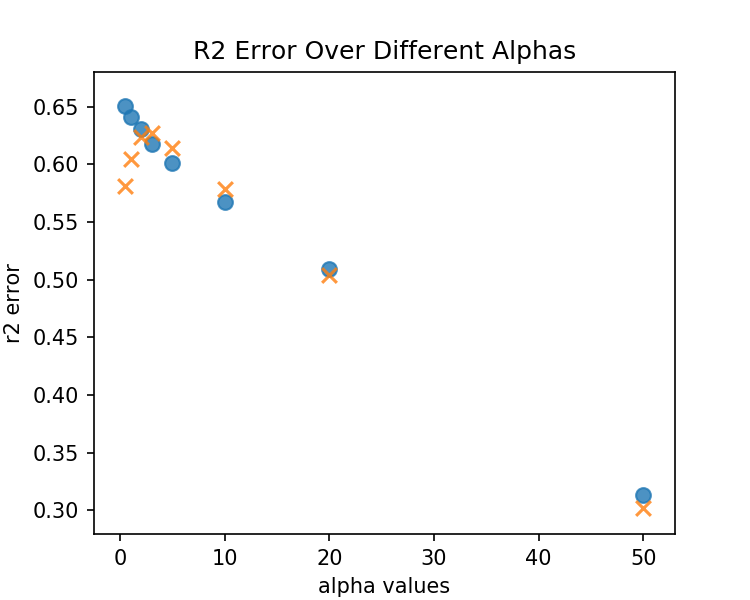

In [19]:
plt.figure(figsize=(5,4))
alphas = all_alphas
plt.scatter(alphas, all_r2_train, marker= 'o', s=50, alpha=0.8)
plt.scatter(alphas, all_r2_test, marker= 'x', s=50, alpha=0.8)
plt.title('R2 Error Over Different Alphas')
plt.xlabel('alpha values')
plt.ylabel('r2 error')
plt.show()

## Polynomial regression
- Generate new features consisting of all polynomial combinations of the original features 
- The degree of the polynomial specifies how many variables participate at a time in each new feature (above example: degree 2)
- This is still a weighted linear combination of features, so it's still a linear model, and can use same least-squares estimation method for w and b

**Why would we want to transform our data this way?**
- To capture interactions between the original features by adding them as features to the linear model
- To make a classification problem easier 

**More generally, we can apply other non-linear transformations to create new features**
- (Technically, these are called non-linear basis functions)

Beware of polynomial feature expansion with high as this can lead to **complex models that overfit**
- Thus, polynomial feature expansion is often combined with a regularized learning method like ridge regression.


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0)
# synthetic dataset for more complex regression (7 features)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722


Now we transform the original input data to add polynomial features up to degree 2 (quadratic)

In [21]:
poly = PolynomialFeatures(degree=2)

X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

(poly deg 2) linear model coeff (w):
[ 3.40951018e-12  1.66452443e+01  2.67285381e+01 -2.21348316e+01
  1.24359227e+01  6.93086826e+00  1.04772675e+00  3.71352773e+00
 -1.33785505e+01 -5.73177185e+00  1.61813184e+00  3.66399592e+00
  5.04513181e+00 -1.45835979e+00  1.95156872e+00 -1.51297378e+01
  4.86762224e+00 -2.97084269e+00 -7.78370522e+00  5.14696078e+00
 -4.65479361e+00  1.84147395e+01 -2.22040650e+00  2.16572630e+00
 -1.27989481e+00  1.87946559e+00  1.52962716e-01  5.62073813e-01
 -8.91697516e-01 -2.18481128e+00  1.37595426e+00 -4.90336041e+00
 -2.23535458e+00  1.38268439e+00 -5.51908208e-01 -1.08795007e+00]
(poly deg 2) linear model intercept (b): -3.206
(poly deg 2) R-squared score (training): 0.969
(poly deg 2) R-squared score (test): 0.805



Addition of many polynomial features often leads to **overfitting**, so we often use polynomial features in combination with regression that has a regularization penalty, like ridge regression

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

(poly deg 2 + ridge) linear model coeff (w):
[ 0.          2.229281    4.73349734 -3.15432089  3.8585194   1.60970912
 -0.76967054 -0.14956002 -1.75215371  1.5970487   1.37080607  2.51598244
  2.71746523  0.48531538 -1.9356048  -1.62914955  1.51474518  0.88674141
  0.26141199  2.04931775 -1.93025705  3.61850966 -0.71788143  0.63173956
 -3.16429847  1.29161448  3.545085    1.73422041  0.94347654 -0.51207219
  1.70114448 -1.97949067  1.80687548 -0.2173863   2.87585898 -0.89423157]
(poly deg 2 + ridge) linear model intercept (b): 5.418
(poly deg 2 + ridge) R-squared score (training): 0.826
(poly deg 2 + ridge) R-squared score (test): 0.825


## Linear models for classification

#### Logistic regression
- L2 regularization is 'on' by default (like ridge regression)
- Parameter C controls amount of regularization (default 1.0)
- As with regularized linear regression, it can be important to normalize all features so that they are on the same scale.


In [23]:
# Using LogisticRegression on the cancer dataset. 
# Inspired by Muller and Guido ML book: (https://www.amazon.com/dp/1449369413/)

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
print('Accuracy on the training subset: {:.3f}'.format(log_reg.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg.score(X_test, y_test)))

Accuracy on the training subset: 0.953
Accuracy on the test subset: 0.958


In [25]:
log_reg100 = LogisticRegression(C=100)
log_reg100.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(log_reg100.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg100.score(X_test, y_test)))

Accuracy on the training subset: 0.972
Accuracy on the test subset: 0.965


In [26]:
log_reg001 = LogisticRegression(C=0.01)
log_reg001.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(log_reg001.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg001.score(X_test, y_test)))

Accuracy on the training subset: 0.934
Accuracy on the test subset: 0.930


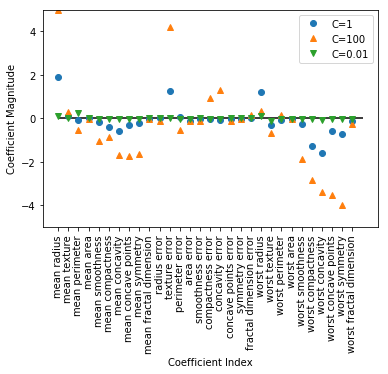

In [27]:
plt.plot(log_reg.coef_.T, 'o', label='C=1')
plt.plot(log_reg100.coef_.T, '^', label='C=100')
plt.plot(log_reg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()

smaller C specify stronger regularization.